In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
from tensorflow import ConfigProto
from tensorflow import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3649 images belonging to 2 classes.


In [33]:
valid_set = valid_datagen.flow_from_directory('valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 806 images belonging to 2 classes.


In [10]:
# Using the Resnet152v2 architecture pre tained on imagenet dataset

image_size = [224,224]
resnet =  tf.keras.applications.ResNet152V2(input_shape = image_size +[3], weights ='imagenet', include_top = False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
234553344/234545216 [==============================] - 306s 1us/step


In [20]:
for layer in resnet.layers[0:-4]:
    print (layer)
    layer.trainable = False


In [23]:
flatten_layer = Flatten()(resnet.output)

In [24]:
dense_1 = Dense(128, activation = 'relu')(flatten_layer)
output = Dense(2, activation ='softmax' )(dense_1)
model = Model(inputs = resnet.input, outputs = output )

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [26]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+keras.backend.epsilon()))

In [30]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
             )

In [34]:
model_path = '.'
checkpoint = ModelCheckpoint(model_path, monitor = 'val_accuracy', verbose = 1, save_best_only = True)
callback_ = [checkpoint]

In [35]:
mdl = model.fit(training_set,
               validation_data= valid_set,
               epochs = 10,
               steps_per_epoch = len(training_set),
               validation_steps = len(test_set),
               callbacks = callback_)

Epoch 1/10
 32/115 [=======>......................] - ETA: 29s - loss: 1.8259 - acc: 0.8955 - precision: 0.8955 - recall: 0.8955

/home/meg/.virtualenvs/myenv/lib/python3.6/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


115/115 [==============================] - 41s 356ms/step - loss: 0.5654 - acc: 0.9537 - precision: 0.9537 - recall: 0.9537 - val_loss: 0.0381 - val_acc: 0.9888 - val_precision: 0.9888 - val_recall: 0.9888
Epoch 2/10
115/115 [==============================] - 38s 329ms/step - loss: 0.0499 - acc: 0.9841 - precision: 0.9841 - recall: 0.9841 - val_loss: 0.0177 - val_acc: 0.9901 - val_precision: 0.9901 - val_recall: 0.9901
Epoch 3/10
115/115 [==============================] - 37s 326ms/step - loss: 0.0279 - acc: 0.9931 - precision: 0.9931 - recall: 0.9931 - val_loss: 0.0202 - val_acc: 0.9950 - val_precision: 0.9950 - val_recall: 0.9950
Epoch 4/10
115/115 [==============================] - 38s 327ms/step - loss: 0.0302 - acc: 0.9942 - precision: 0.9942 - recall: 0.9942 - val_loss: 0.0297 - val_acc: 0.9926 - val_precision: 0.9926 - val_recall: 0.9926
Epoch 5/10
115/115 [==============================] - 38s 327ms/step - loss: 0.0272 - acc: 0.9929 - precision: 0.9929 - recall: 0.9929 - val_lo

In [45]:
model.save('resnet.h5')

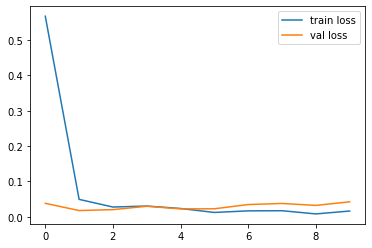

In [39]:
plt.plot(mdl.history['loss'], label = 'train loss')
plt.plot(mdl.history['val_loss'], label = 'val loss')
plt.legend()
plt.savefig('Loss plot')
plt.show()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
